# 5. Modeling
## (2) <span style = 'color:darkcyan'>Liner Regression 모델</span>을 사용하여 6,7,8월 음식물 쓰레기 예측

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA

import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.base import ClassifierMixin

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import RegressorMixin
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, clear_output
import shap
import kerastuner as kt
print(tf.__version__)
from pycaret.regression import *
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 


2.5.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [3]:
A0 = pd.read_csv('features/군집0_feature_corona.csv')
A1 = pd.read_csv('features/군집1_feature_corona.csv')
A2 = pd.read_csv('features/군집2_feature_corona.csv')
A3 = pd.read_csv('features/군집3_feature_corona.csv')
A4 = pd.read_csv('features/군집4_feature_corona.csv')
A5 = pd.read_csv('features/군집5_feature_corona.csv')
A6 = pd.read_csv('features/군집6_feature_corona.csv')

In [4]:
A0['base_date_jh']=pd.to_datetime(A0['base_date_jh'])
A0['day'] = A0['base_date_jh'].dt.day
A0['month'] = A0['base_date_jh'].dt.month
A0['year'] = A0['base_date_jh'].dt.year
A0['week'] = A0['base_date_jh'].dt.weekofyear

A1['base_date_jh']=pd.to_datetime(A1['base_date_jh'])
A1['day'] = A1['base_date_jh'].dt.day
A1['month'] = A1['base_date_jh'].dt.month
A1['year'] = A1['base_date_jh'].dt.year
A1['week'] = A1['base_date_jh'].dt.weekofyear

A2['base_date_jh']=pd.to_datetime(A2['base_date_jh'])
A2['day'] = A2['base_date_jh'].dt.day
A2['month'] = A2['base_date_jh'].dt.month
A2['year'] = A2['base_date_jh'].dt.year
A2['week'] = A2['base_date_jh'].dt.weekofyear

A3['base_date_jh']=pd.to_datetime(A3['base_date_jh'])
A3['day'] = A3['base_date_jh'].dt.day
A3['month'] = A3['base_date_jh'].dt.month
A3['year'] = A3['base_date_jh'].dt.year
A3['week'] = A3['base_date_jh'].dt.weekofyear

A4['base_date_jh']=pd.to_datetime(A4['base_date_jh'])
A4['day'] = A4['base_date_jh'].dt.day
A4['month'] = A4['base_date_jh'].dt.month
A4['year'] = A4['base_date_jh'].dt.year
A4['week'] = A4['base_date_jh'].dt.weekofyear

A5['base_date_jh']=pd.to_datetime(A5['base_date_jh'])
A5['day'] = A5['base_date_jh'].dt.day
A5['month'] = A5['base_date_jh'].dt.month
A5['year'] = A5['base_date_jh'].dt.year
A5['week'] = A5['base_date_jh'].dt.weekofyear

A6['base_date_jh']=pd.to_datetime(A6['base_date_jh'])
A6['day'] = A6['base_date_jh'].dt.day
A6['month'] = A6['base_date_jh'].dt.month
A6['year'] = A6['base_date_jh'].dt.year
A6['week'] = A6['base_date_jh'].dt.weekofyear

# 6월 예측

## 군집0

### # 차이예측

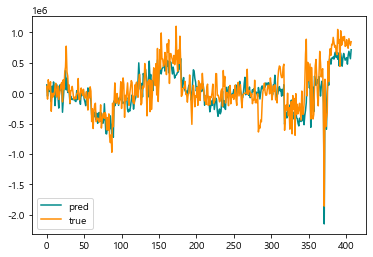

MSE: 57533120760.29413    MAE: 185331.31372861087


In [5]:
# train의 y값에 2021년 5월 y값에서 2020년 5월의 y값을 뺀 값을 넣어준다.
train_y = A0.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A0.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값으로 넣어준다.
test_y = A0.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A0.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A0.loc[(A0['year']==2021) & (A0['month']==4), :],A0.loc[(A0['year']!=2021) & (A0['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A0.loc[(A0['year']==2021) & (A0['month']==5), :],A0.loc[(A0['year']!=2021) & (A0['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A0 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A0.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [6]:
# 2020년 6월 실제 y값에 예측값을 더해준다.
A0_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A0_No1 = A0.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A0_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A0_No1['pred_No1'] = A0_No1['em_g_2020'] + A0_No1['pred']
A0_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

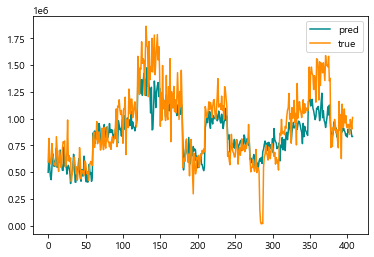

MSE: 42069675527.15984    MAE: 152474.73704432457


In [7]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A0.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A0.loc[(A0['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A0.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A0.loc[(A0['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A0 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A0.predict(test.iloc[:,3:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [8]:
A0_No2 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

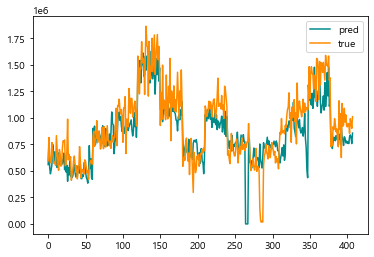

MSE: 41858543092.817375    MAE: 153046.98738266632


In [9]:
# 차이예측과 5월로 6월예측 평균을 낸다.
A0_pred = A0_No1.merge(A0_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='right', on=['emd_nm_jh','day'])
A0_pred['pred'] = (A0_pred['pred_No1'] + A0_pred['pred_No2'])/2
A0_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A0_pred.fillna(0, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A0_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A0_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A0_No2[['true']], A0_pred[['pred']])
mae = mean_absolute_error(A0_No2[['true']], A0_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

## 군집1

### # 차이예측

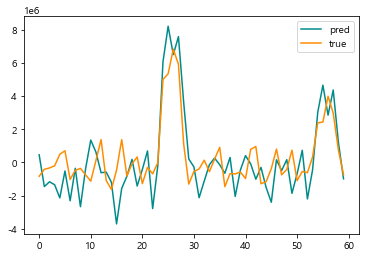

MSE: 2046822513567.4294    MAE: 1171860.0839927925


In [10]:
# train의 y값에 2021년 5월 y값에서 2020년 5월의 y값을 뺀 값을 넣어준다.
train_y = A1.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A1.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값으로 넣어준다.
test_y = A1.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A1.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A1.loc[(A1['year']==2021) & (A1['month']==4), :],A1.loc[(A1['year']!=2021) & (A1['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A1.loc[(A1['year']==2021) & (A1['month']==5), :],A1.loc[(A1['year']!=2021) & (A1['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A1 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A1.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [11]:
# 2020년 6월 실제 y값에 예측값을 더해준다.
A1_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A1_No1 = A1.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A1_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh','day'])

A1_No1['pred_No1'] = A1_No1['em_g_2020'] + A1_No1['pred']
A1_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

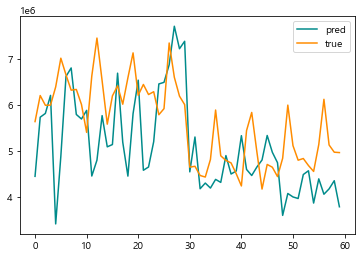

MSE: 1211760693356.2185    MAE: 872217.2913185892


In [12]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A1.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A1.loc[(A1['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A1.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A1.loc[(A1['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A1 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A1.predict(test.iloc[:,:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [13]:
A1_No2 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

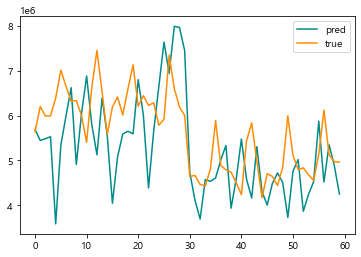

MSE: 1119277208867.6963    MAE: 814371.4290862788


In [14]:
# 차이예측과 5월로 6월예측 평균을 낸다.
A1_pred = A1_No1.merge(A1_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh', 'day'])
A1_pred['pred'] = (A1_pred['pred_No1'] + A1_pred['pred_No2'])/2
A1_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A1_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A1_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A1_No2[['true']], A1_pred[['pred']])
mae = mean_absolute_error(A1_No2[['true']], A1_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

## 군집2

### # 차이예측

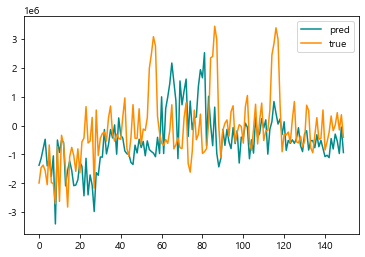

MSE: 1709250401223.125    MAE: 973133.3957352217


In [15]:
train_y = A2.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A2.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

test_y = A2.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A2.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A2.loc[(A2['year']==2021) & (A2['month']==4), :],A2.loc[(A2['year']!=2021) & (A2['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A2.loc[(A2['year']==2021) & (A2['month']==5), :],A2.loc[(A2['year']!=2021) & (A2['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A2 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A2.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [16]:
# 2020년 6월 실제 y값에 예측값을 더해준다.
A2_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A2_No1 = A2.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A2_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A2_No1['pred_No1'] = A2_No1['em_g_2020'] + A2_No1['pred']
A2_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

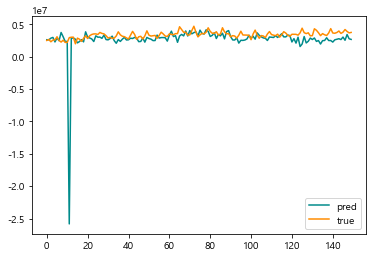

MSE: 6132083417987.565    MAE: 816012.7034830645


In [17]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A2.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A2.loc[(A2['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A2.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A2.loc[(A2['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A2 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A2.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [18]:
A2_No2 = pd.concat([true, pd.DataFrame(pd.DataFrame(pred).apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0])],
                   axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

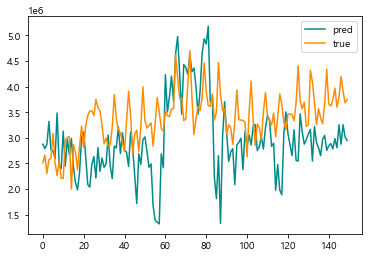

MSE: 734165674630.2524    MAE: 681668.3020302426


In [19]:
# 차이예측과 5월로 6월예측 평균을 낸다.
A2_pred = A2_No1.merge(A2_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh', 'day'])
A2_pred['pred'] = (A2_pred['pred_No1'] + A2_pred['pred_No2'])/2
A2_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A2_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A2_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A2_No2[['true']], A2_pred[['pred']])
mae = mean_absolute_error(A2_No2[['true']], A2_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

## 군집3

### # 차이예측

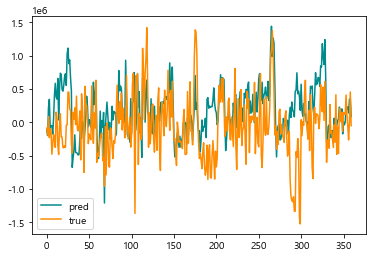

MSE: 289665240557.6694    MAE: 417449.23465643293


In [20]:
train_y = A3.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A3.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

test_y = A3.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A3.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A3.loc[(A3['year']==2021) & (A3['month']==4), :],A3.loc[(A3['year']!=2021) & (A3['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A3.loc[(A3['year']==2021) & (A3['month']==5), :],A3.loc[(A3['year']!=2021) & (A3['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A3 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A3.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [21]:
# 2020년 6월 실제 y값에 예측값을 더해준다.
A3_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A3_No1 = A3.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A3_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A3_No1['pred_No1'] = A3_No1['em_g_2020'] + A3_No1['pred']
A3_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

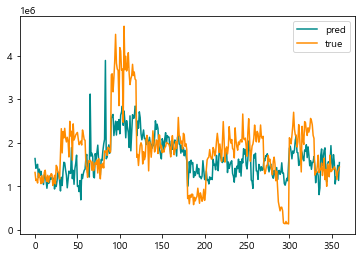

MSE: 409543765624.2263    MAE: 491106.4102119219


In [22]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A3.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A3.loc[(A3['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A3.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A3.loc[(A3['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A3 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A3.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [23]:
A3_No2 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

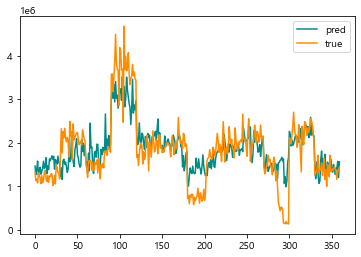

MSE: 207318798992.96423    MAE: 341207.202155083


In [24]:
# 차이예측과 5월로 6월예측 평균을 낸다.
A3_pred = A3_No1.merge(A3_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh', 'day'])
A3_pred['pred'] = (A3_pred['pred_No1'] + A3_pred['pred_No2'])/2
A3_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A3_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A3_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A3_No2[['true']], A3_pred[['pred']])
mae = mean_absolute_error(A3_No2[['true']], A3_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

## 군집4

### # 차이예측

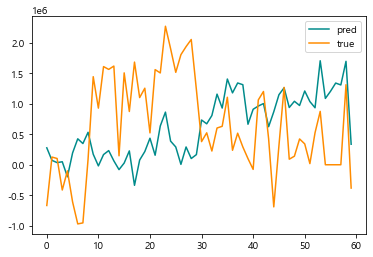

MSE: 1038711226234.0042    MAE: 876352.9944899045


In [25]:
train_y = A4.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A4.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

test_y = A4.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A4.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A4.loc[(A4['year']==2021) & (A4['month']==4), :],A4.loc[(A4['year']!=2021) & (A4['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A4.loc[(A4['year']==2021) & (A4['month']==5), :],A4.loc[(A4['year']!=2021) & (A4['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A4 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A4.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [26]:
# 2020년 6월 실제 y값에 예측값을 더해준다.
A4_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A4_No1 = A4.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A4_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A4_No1['pred_No1'] = A4_No1['em_g_2020'] + A4_No1['pred']
A4_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

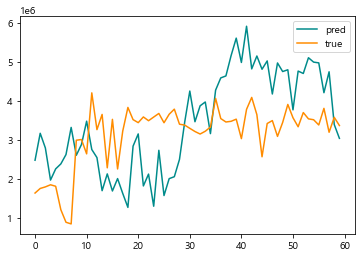

MSE: 1757861702595.7195    MAE: 1136055.5196704338


In [27]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A4.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A4.loc[(A4['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A4.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A4.loc[(A4['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A4 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A4.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [28]:
A4_No2 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

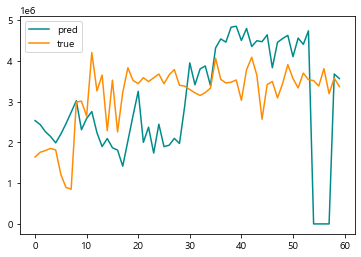

MSE: 1945085869577.7932    MAE: 1113327.15793347


In [29]:
## 차이예측과 5월로 6월예측 평균을 낸다.
A4_pred = A4_No1.merge(A4_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='right', on=['emd_nm_jh', 'day'])
A4_pred['pred'] = (A4_pred['pred_No1'] + A4_pred['pred_No2'])/2
A4_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A4_pred.fillna(0, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A4_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A4_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A4_No2[['true']], A4_pred[['pred']])
mae = mean_absolute_error(A4_No2[['true']], A4_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

## 군집5

### # 차이예측

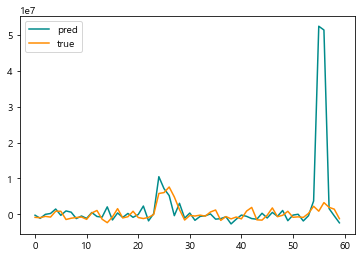

MSE: 85439429507140.81    MAE: 2848651.5624837456


In [30]:
train_y = A5.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A5.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

test_y = A5.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A5.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A5.loc[(A5['year']==2021) & (A5['month']==4), :],A5.loc[(A5['year']!=2021) & (A5['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A5.loc[(A5['year']==2021) & (A5['month']==5), :],A5.loc[(A5['year']!=2021) & (A5['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A5 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A5.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [31]:
# 2020년 6월 실제 y값에 예측값을 더해준다. 이때, 극단적으로 예측하는 값이 있으므로 상위 5%와 하위 5%를 제거해준다.
A5_No1 = pd.concat([true, pd.DataFrame(pd.DataFrame(pred).apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0])],
                   axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A5_No1 = A5.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A5_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A5_No1['pred_No1'] = A5_No1['em_g_2020'] + A5_No1['pred']
A5_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

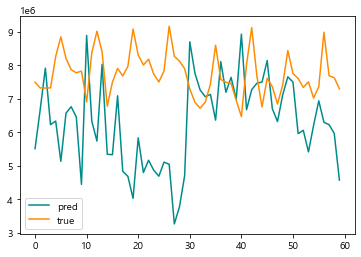

MSE: 4721354702453.766    MAE: 1759221.8301541035


In [32]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A5.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A5.loc[(A5['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A5.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A5.loc[(A5['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A5 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A5.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [33]:
A5_No2 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

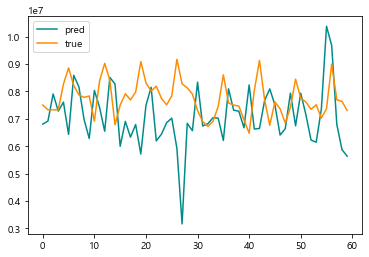

MSE: 2182055724453.3594    MAE: 1108866.0520258571


In [34]:
# 차이예측과 5월로 6월예측 평균을 낸다.
A5_pred = A5_No1.merge(A5_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh', 'day'])
A5_pred['pred'] = (A5_pred['pred_No1'] + A5_pred['pred_No2'])/2
A5_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A5_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A5_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A5_No2[['true']], A5_pred[['pred']])
mae = mean_absolute_error(A5_No2[['true']], A5_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

## 군집6

### # 차이예측

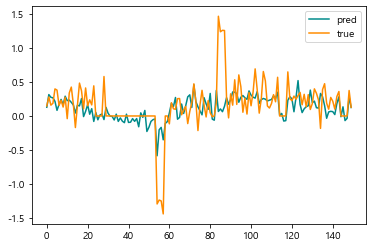

MSE: 0.09608913318581726    MAE: 0.1819463962778505


In [35]:
train_y = A6.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A6.query('year == 2020 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

test_y = A6.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A6.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}),
         how='left', on=['emd_nm_jh','day'])
test_y['em_g_jh'] = test_y['em_g_2021']-test_y['em_g_2020']
test_y.drop(['em_g_2021','em_g_2020'], axis = 1, inplace=True)
test_y = test_y.fillna(0)


train = pd.concat([train_y,
    pd.concat([A6.loc[(A6['year']==2021) & (A6['month']==4), :],A6.loc[(A6['year']!=2021) & (A6['month']==5), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = test_y.\
    merge(pd.concat([A6.loc[(A6['year']==2021) & (A6['month']==5), :],A6.loc[(A6['year']!=2021) & (A6['month']==6), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A6 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A6.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [36]:
# 2020년 6월 실제 y값에 예측값을 더해준다.
A6_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A6_No1 = A6.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A6_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A6_No1['pred_No1'] = A6_No1['em_g_2020'] + A6_No1['pred']
A6_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 5월로 6월 예측

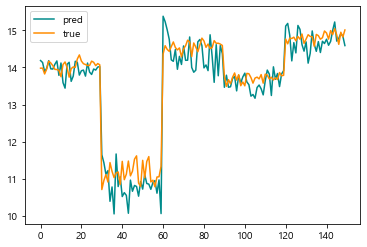

MSE: 0.1823833917175812    MAE: 0.3295081343988477


In [37]:
# train y값에 2021년 5월을 넣어준다.
train = pd.concat([A6.query('year == 2021 and month==5').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A6.loc[(A6['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
# test y값, 즉, 우리가 예측할 값을 2021년 6월 값으로 넣어준다.
test =  A6.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().\
    merge(A6.loc[(A6['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1), how='left', on=['emd_nm_jh','day'])

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A6 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A6.predict(test.iloc[:,3:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkcyan')
plt.plot(np.array(true[['em_g_jh']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()

# MSE와 MAE값을 출력한다.
mse = mean_squared_error(true[['em_g_jh']], pred)
mae = mean_absolute_error(true[['em_g_jh']], pred)
print('MSE:',mse,'  ','MAE:',mae)

In [38]:
A6_No2 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred_No2'})

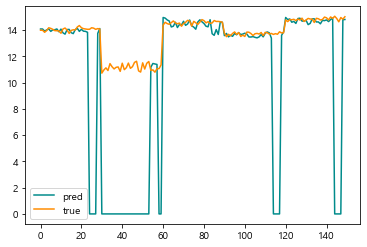

MSE: 37.98270526708978    MAE: 3.241277836147381


In [39]:
# 차이예측과 5월로 6월예측 평균을 낸다.
A6_pred = A6_No1.merge(A6_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='right', on=['emd_nm_jh', 'day'])
A6_pred['pred'] = (A6_pred['pred_No1'] + A6_pred['pred_No2'])/2
A6_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A6_pred.fillna(0, inplace=True)

# 차이예측과 5월로 6월예측 평균낸걸로 시각화
plt.plot(np.array(A6_pred[['pred']]),label = "pred", color = 'darkcyan')
plt.plot(np.array(A6_No2[['true']]),label = "true", color = 'darkorange')
plt.legend()
plt.show()
# MSE와 MAE값을 출력한다.
mse = mean_squared_error(A6_No2[['true']], A6_pred[['pred']])
mae = mean_absolute_error(A6_No2[['true']], A6_pred[['pred']])
print('MSE:',mse,'  ','MAE:',mae)

# 6월 예측 csv

In [40]:
pd.concat([A0_pred.rename(columns={'pred':'lr0'}).drop(['emd_nm_jh','day'], axis=1),
           A1_pred.rename(columns={'pred':'lr1'}).drop(['emd_nm_jh','day'], axis=1),
           A2_pred.rename(columns={'pred':'lr2'}).drop(['emd_nm_jh','day'], axis=1),
           A3_pred.rename(columns={'pred':'lr3'}).drop(['emd_nm_jh','day'], axis=1),
           A4_pred.rename(columns={'pred':'lr4'}).drop(['emd_nm_jh','day'], axis=1),
           A5_pred.rename(columns={'pred':'lr5'}).drop(['emd_nm_jh','day'], axis=1),
           A6_pred.rename(columns={'pred':'lr6'}).drop(['emd_nm_jh','day'], axis=1)], axis=1).to_csv('predict/lr_06_predict.csv', index=False)

# 7월 예측

## 군집0

### # 차이예측

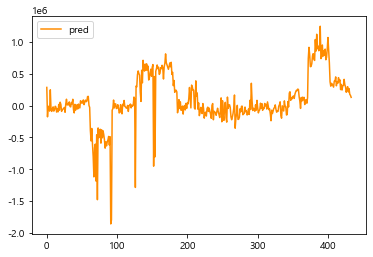

In [41]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A0.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A0.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A0.loc[(A0['year']==2021) & (A0['month']==5), :],A0.loc[(A0['year']!=2021) & (A0['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A0.loc[(A0['year']==2021) & (A0['month']==6), :],A0.loc[(A0['year']!=2021) & (A0['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A0 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A0.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [42]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A0_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A0_No1 = A0.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A0_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A0_No1['pred_No1'] = A0_No1['em_g_2020'] + A0_No1['pred']
A0_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

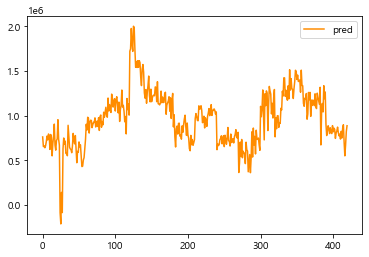

In [43]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A0.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A0.loc[(A0['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A0.loc[(A0['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A0 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A0.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

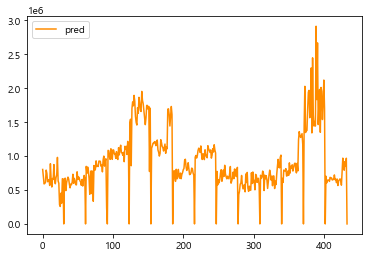

In [44]:
A0_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A0_pred = A0_No1.merge(A0_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A0_pred['pred'] = (A0_pred['pred_No1'] + A0_pred['pred_No2'])/2
A0_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A0_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A0_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집1

### # 차이예측

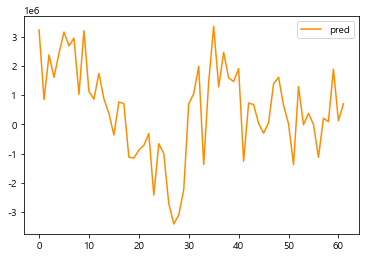

In [45]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A1.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A1.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A1.loc[(A1['year']==2021) & (A1['month']==5), :],A1.loc[(A1['year']!=2021) & (A1['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A1.loc[(A1['year']==2021) & (A1['month']==6), :],A1.loc[(A1['year']!=2021) & (A1['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A1 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A1.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [46]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A1_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A1_No1 = A1.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A1_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A1_No1['pred_No1'] = A1_No1['em_g_2020'] + A1_No1['pred']
A1_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

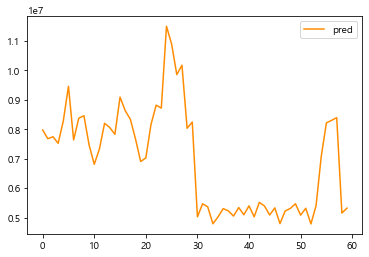

In [47]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A1.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A1.loc[(A1['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A1.loc[(A1['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A1 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A1.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

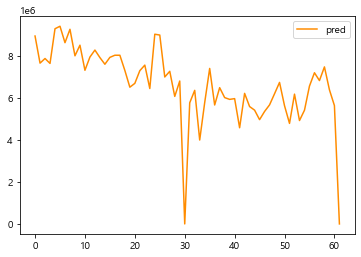

In [48]:
A1_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A1_pred = A1_No1.merge(A1_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A1_pred['pred'] = (A1_pred['pred_No1'] + A1_pred['pred_No2'])/2
A1_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A1_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A1_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집2

### # 차이예측

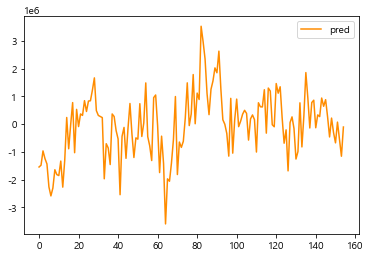

In [49]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A2.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A2.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A2.loc[(A2['year']==2021) & (A2['month']==5), :],A2.loc[(A2['year']!=2021) & (A2['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A2.loc[(A2['year']==2021) & (A2['month']==6), :],A2.loc[(A2['year']!=2021) & (A2['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A2 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A2.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [50]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A2_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A2_No1 = A2.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A2_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A2_No1['pred_No1'] = A2_No1['em_g_2020'] + A2_No1['pred']
A2_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

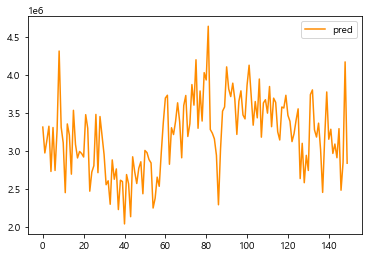

In [51]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A2.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A2.loc[(A2['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A2.loc[(A2['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A2 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A2.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

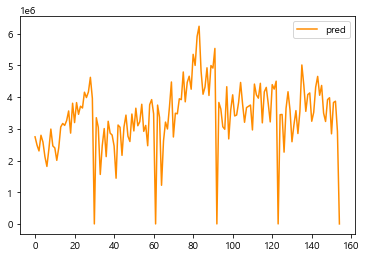

In [52]:
A2_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A2_pred = A2_No1.merge(A2_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A2_pred['pred'] = (A2_pred['pred_No1'] + A2_pred['pred_No2'])/2
A2_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A2_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A2_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집3

### # 차이예측

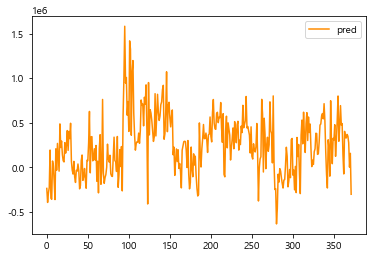

In [53]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A3.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A3.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A3.loc[(A3['year']==2021) & (A3['month']==5), :],A3.loc[(A3['year']!=2021) & (A3['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A3.loc[(A3['year']==2021) & (A3['month']==6), :],A3.loc[(A3['year']!=2021) & (A3['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A3 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A3.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [54]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A3_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A3_No1 = A3.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A3_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A3_No1['pred_No1'] = A3_No1['em_g_2020'] + A3_No1['pred']
A3_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

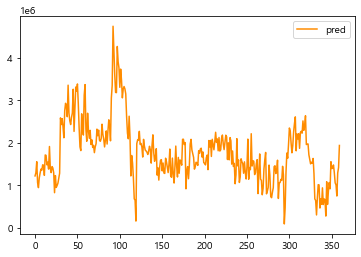

In [55]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A3.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A3.loc[(A3['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A3.loc[(A3['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A3 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A3.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

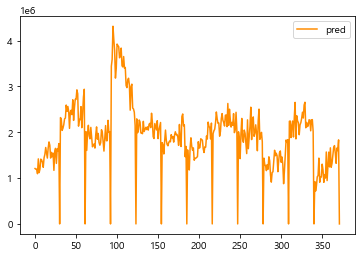

In [56]:
A3_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A3_pred = A3_No1.merge(A3_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A3_pred['pred'] = (A3_pred['pred_No1'] + A3_pred['pred_No2'])/2
A3_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A3_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A3_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집4

### # 차이예측

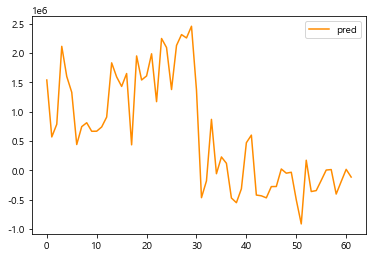

In [57]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A4.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A4.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A4.loc[(A4['year']==2021) & (A4['month']==5), :],A4.loc[(A4['year']!=2021) & (A4['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A4.loc[(A4['year']==2021) & (A4['month']==6), :],A4.loc[(A4['year']!=2021) & (A4['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A4 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A4.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [58]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A4_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A4_No1 = A4.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A4_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A4_No1['pred_No1'] = A4_No1['em_g_2020'] + A4_No1['pred']
A4_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

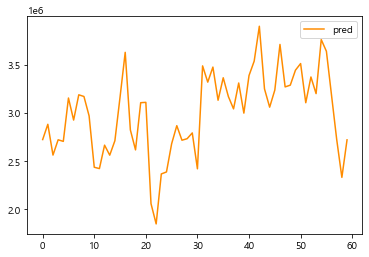

In [59]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A4.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A4.loc[(A4['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A4.loc[(A4['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A4 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A4.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

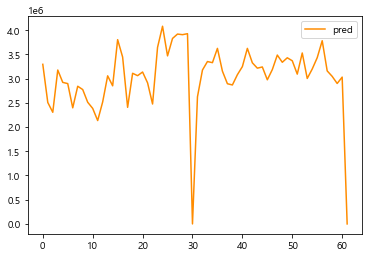

In [60]:
A4_No2 = pd.concat([test, pd.DataFrame(pred.apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0]).rename(columns={0:'pred_No2'})],
                   axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A4_pred = A4_No1.merge(A4_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A4_pred['pred'] = (A4_pred['pred_No1'] + A4_pred['pred_No2'])/2
A4_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A4_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A4_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집5

### # 차이예측

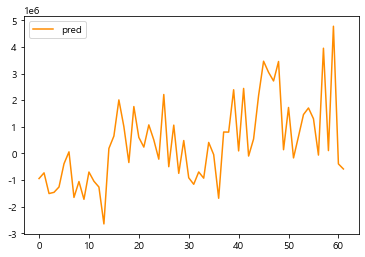

In [61]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A5.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A5.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A5.loc[(A5['year']==2021) & (A5['month']==5), :],A5.loc[(A5['year']!=2021) & (A5['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A5.loc[(A5['year']==2021) & (A5['month']==6), :],A5.loc[(A5['year']!=2021) & (A5['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A5 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A5.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [62]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A5_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A5_No1 = A5.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A5_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A5_No1['pred_No1'] = A5_No1['em_g_2020'] + A5_No1['pred']
A5_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

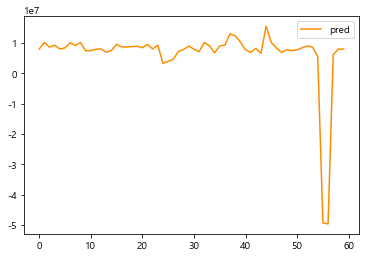

In [63]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A5.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A5.loc[(A5['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A5.loc[(A5['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A5 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A5.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

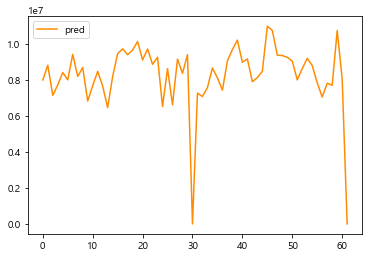

In [64]:
A5_No2 = pd.concat([test, pd.DataFrame(pred.apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0]).rename(columns={0:'pred_No2'})],
                   axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A5_pred = A5_No1.merge(A5_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A5_pred['pred'] = (A5_pred['pred_No1'] + A5_pred['pred_No2'])/2
A5_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A5_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A5_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집6

### # 차이예측

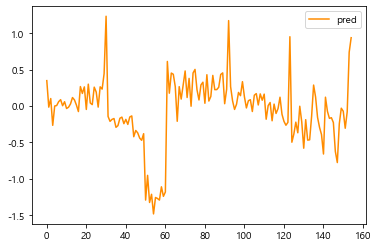

In [65]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A6.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A6.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A6.loc[(A6['year']==2021) & (A6['month']==5), :],A6.loc[(A6['year']!=2021) & (A6['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A6.loc[(A6['year']==2021) & (A6['month']==6), :],A6.loc[(A6['year']!=2021) & (A6['month']==7), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A6 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A6.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [66]:
# 2020년 7월 실제 y값에 예측값을 더해준다.
A6_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A6_No1 = A6.query('year == 2020 and month==7').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A6_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A6_No1['pred_No1'] = A6_No1['em_g_2020'] + A6_No1['pred']
A6_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 7월 예측

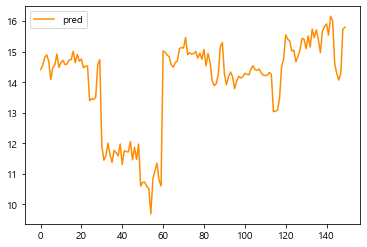

In [67]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A6.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A6.loc[(A6['month']==5), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A6.loc[(A6['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A6 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A6.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

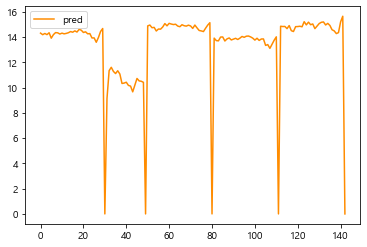

In [68]:
A6_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 7월예측 평균을 낸다.
A6_pred = A6_No1.merge(A6_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A6_pred['pred'] = (A6_pred['pred_No1'] + A6_pred['pred_No2'])/2
A6_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A6_pred.fillna(0, inplace=True)

# 차이예측과 6월로 7월예측 평균낸걸로 시각화
plt.plot(np.array(A6_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

# 7월 예측 csv

In [69]:
pd.concat([A0_pred.rename(columns={'pred':'lr0'}).drop(['emd_nm_jh','day'], axis=1),
           A1_pred.rename(columns={'pred':'lr1'}).drop(['emd_nm_jh','day'], axis=1),
           A2_pred.rename(columns={'pred':'lr2'}).drop(['emd_nm_jh','day'], axis=1),
           A3_pred.rename(columns={'pred':'lr3'}).drop(['emd_nm_jh','day'], axis=1),
           A4_pred.rename(columns={'pred':'lr4'}).drop(['emd_nm_jh','day'], axis=1),
           A5_pred.rename(columns={'pred':'lr5'}).drop(['emd_nm_jh','day'], axis=1),
           A6_pred.rename(columns={'pred':'lr6'}).drop(['emd_nm_jh','day'], axis=1)], axis=1).to_csv('predict/lr_07_predict.csv', index=False)

# 8월 예측

## 군집0

### # 차이예측

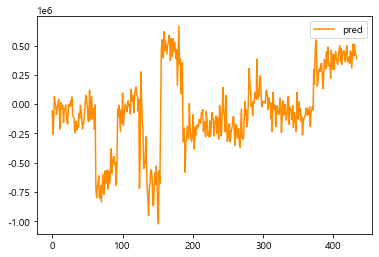

In [70]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A0.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A0.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A0.loc[(A0['year']==2021) & (A0['month']==4), :],A0.loc[(A0['year']!=2021) & (A0['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A0.loc[(A0['year']==2021) & (A0['month']==6), :],A0.loc[(A0['year']!=2021) & (A0['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A0 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A0.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [71]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A0_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A0_No1 = A0.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A0_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A0_No1['pred_No1'] = A0_No1['em_g_2020'] + A0_No1['pred']
A0_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

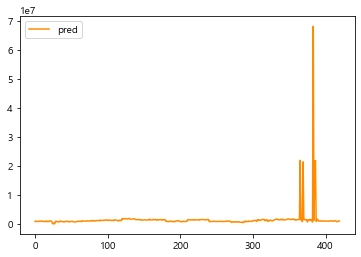

In [72]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A0.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A0.loc[(A0['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A0.loc[(A0['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A0 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A0.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

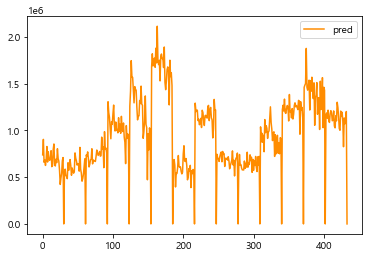

In [73]:
A0_No2 = pd.concat([test, pd.DataFrame(pred.apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0]).rename(columns={0:'pred_No2'})],
                   axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A0_pred = A0_No1.merge(A0_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A0_pred['pred'] = (A0_pred['pred_No1'] + A0_pred['pred_No2'])/2
A0_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A0_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A0_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집1

### # 차이예측

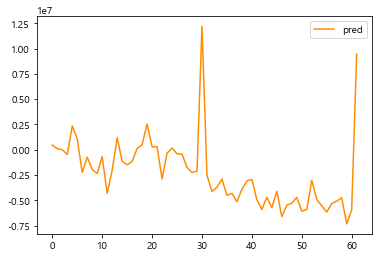

In [74]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A1.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A1.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A1.loc[(A1['year']==2021) & (A1['month']==4), :],A1.loc[(A1['year']!=2021) & (A1['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A1.loc[(A1['year']==2021) & (A1['month']==6), :],A1.loc[(A1['year']!=2021) & (A1['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A1 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A1.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [75]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A1_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A1_No1 = A1.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A1_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A1_No1['pred_No1'] = A1_No1['em_g_2020'] + A1_No1['pred']
A1_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

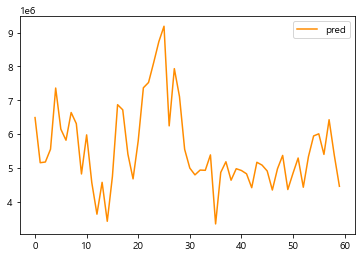

In [76]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A1.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A1.loc[(A1['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A1.loc[(A1['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A1 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A1.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

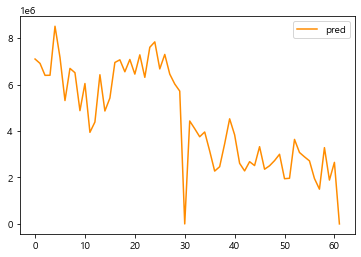

In [77]:
A1_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A1_pred = A1_No1.merge(A1_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A1_pred['pred'] = (A1_pred['pred_No1'] + A1_pred['pred_No2'])/2
A1_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A1_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A1_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집2

### # 차이예측

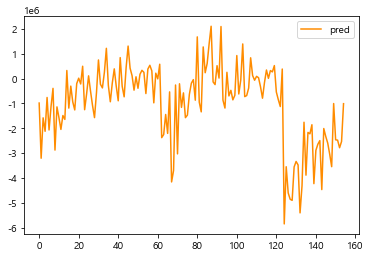

In [78]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A2.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A2.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A2.loc[(A2['year']==2021) & (A2['month']==4), :],A2.loc[(A2['year']!=2021) & (A2['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A2.loc[(A2['year']==2021) & (A2['month']==6), :],A2.loc[(A2['year']!=2021) & (A2['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A2 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A2.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [79]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A2_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A2_No1 = A2.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A2_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A2_No1['pred_No1'] = A2_No1['em_g_2020'] + A2_No1['pred']
A2_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

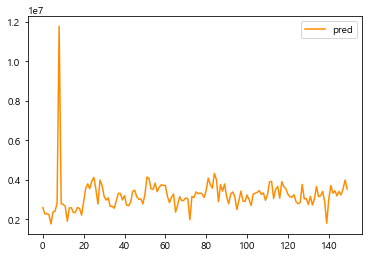

In [80]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A2.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A2.loc[(A2['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A2.loc[(A2['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A2 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A2.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

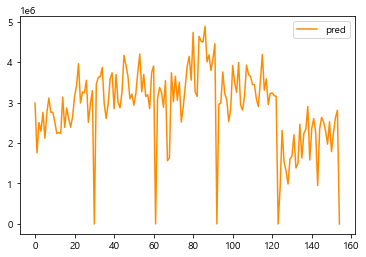

In [81]:
A2_No2 = pd.concat([test, pd.DataFrame(pred.apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0]).rename(columns={0:'pred_No2'})],
                   axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A2_pred = A2_No1.merge(A2_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A2_pred['pred'] = (A2_pred['pred_No1'] + A2_pred['pred_No2'])/2
A2_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A2_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A2_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집3

### # 차이예측

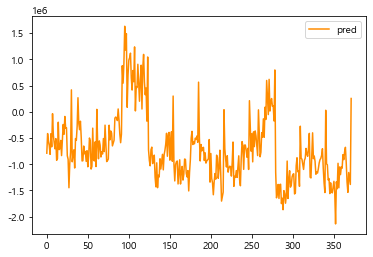

In [82]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A3.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A3.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A3.loc[(A3['year']==2021) & (A3['month']==4), :],A3.loc[(A3['year']!=2021) & (A3['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A3.loc[(A3['year']==2021) & (A3['month']==6), :],A3.loc[(A3['year']!=2021) & (A3['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A3 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A3.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [83]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A3_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A3_No1 = A3.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A3_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A3_No1['pred_No1'] = A3_No1['em_g_2020'] + A3_No1['pred']
A3_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

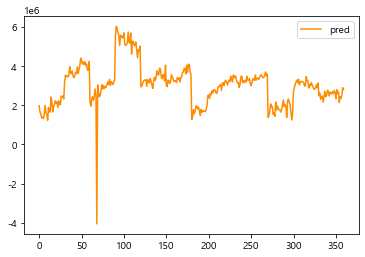

In [84]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A3.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A3.loc[(A3['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A3.loc[(A3['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A3 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A3.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

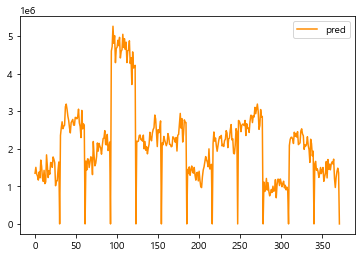

In [85]:
A3_No2 = pd.concat([test, pd.DataFrame(pred.apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0]).rename(columns={0:'pred_No2'})],
                   axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A3_pred = A3_No1.merge(A3_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A3_pred['pred'] = (A3_pred['pred_No1'] + A3_pred['pred_No2'])/2
A3_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A3_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A3_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집4

### # 차이예측

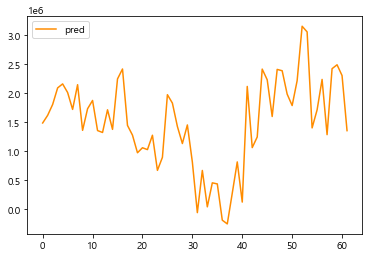

In [86]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A4.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A4.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A4.loc[(A4['year']==2021) & (A4['month']==4), :],A4.loc[(A4['year']!=2021) & (A4['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A4.loc[(A4['year']==2021) & (A4['month']==6), :],A4.loc[(A4['year']!=2021) & (A4['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A4 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A4.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [87]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A4_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A4_No1 = A4.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A4_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A4_No1['pred_No1'] = A4_No1['em_g_2020'] + A4_No1['pred']
A4_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

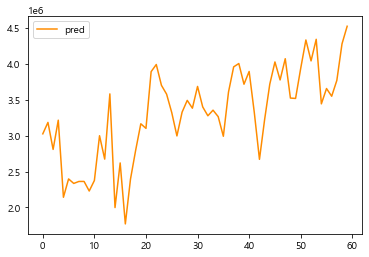

In [88]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A4.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A4.loc[(A4['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A4.loc[(A4['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A4 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A4.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

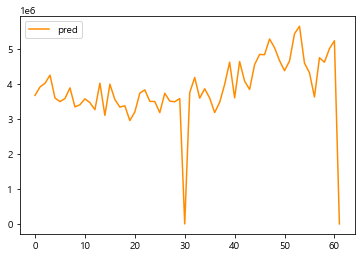

In [89]:
A4_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A4_pred = A4_No1.merge(A4_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A4_pred['pred'] = (A4_pred['pred_No1'] + A4_pred['pred_No2'])/2
A4_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A4_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A4_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집5

### # 차이예측

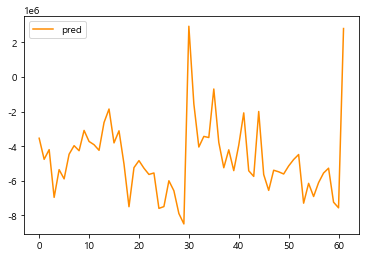

In [90]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A5.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A5.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A5.loc[(A5['year']==2021) & (A5['month']==4), :],A5.loc[(A5['year']!=2021) & (A5['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A5.loc[(A5['year']==2021) & (A5['month']==6), :],A5.loc[(A5['year']!=2021) & (A5['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A5 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A5.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [91]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A5_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A5_No1 = A5.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A5_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A5_No1['pred_No1'] = A5_No1['em_g_2020'] + A5_No1['pred']
A5_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

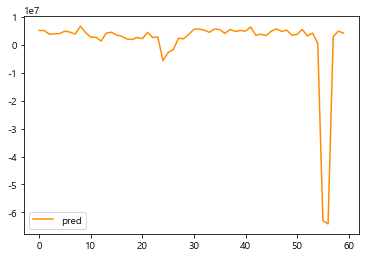

In [92]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A5.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A5.loc[(A5['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A5.loc[(A5['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A5 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A5.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

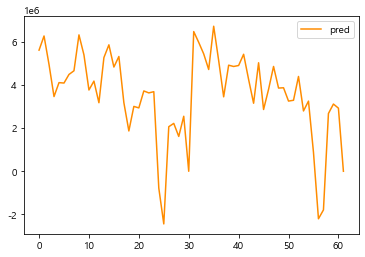

In [93]:
A5_No2 = pd.concat([test, pd.DataFrame(pred.apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)[0]).rename(columns={0:'pred_No2'})],
                   axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A5_pred = A5_No1.merge(A5_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A5_pred['pred'] = (A5_pred['pred_No1'] + A5_pred['pred_No2'])/2
A5_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A5_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A5_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

## 군집6

### # 차이예측

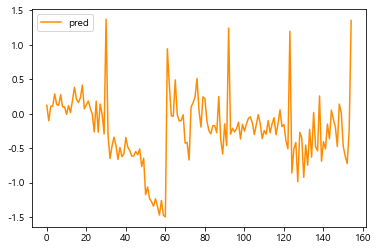

In [94]:
# train의 y값에 2021년 6월 y값에서 2020년 6월의 y값을 뺀 값을 넣어준다.
train_y = A6.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2021'}).\
    merge(A6.query('year == 2020 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}), how='left', on=['emd_nm_jh','day'])
train_y['em_g_jh'] = train_y['em_g_2021']-train_y['em_g_2020']
train_y = train_y[['em_g_jh']]
train_y = train_y.fillna(0)

train = pd.concat([train_y,
    pd.concat([A6.loc[(A6['year']==2021) & (A6['month']==4), :],A6.loc[(A6['year']!=2021) & (A6['month']==6), :]])
                   .groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)
test = pd.concat([A6.loc[(A6['year']==2021) & (A6['month']==6), :],A6.loc[(A6['year']!=2021) & (A6['month']==8), :]])\
                   .groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A6 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A6.predict(test.iloc[:,2:-3]))
true = test.iloc[:,:3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

In [95]:
# 2020년 8월 실제 y값에 예측값을 더해준다.
A6_No1 = pd.concat([true, pred], axis=1).rename(columns={'em_g_jh':'true', 0:'pred'})
A6_No1 = A6.query('year == 2020 and month==8').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index().rename(columns = {'em_g_jh':'em_g_2020'}).\
    merge(A6_No1.reset_index()[['emd_nm_jh','day','pred']], how='left', on=['emd_nm_jh', 'day'])

A6_No1['pred_No1'] = A6_No1['em_g_2020'] + A6_No1['pred']
A6_No1.drop(['em_g_2020','pred'], axis=1, inplace=True)

### # 6월로 8월 예측

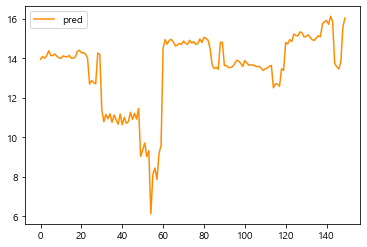

In [96]:
# train y값에 2021년 6월을 넣어준다.
train = pd.concat([A6.query('year == 2021 and month==6').groupby(['emd_nm_jh','day']).sum()[['em_g_jh']].reset_index(drop=True),
    A6.loc[(A6['month']==4), :].groupby(['emd_nm_jh','day']).sum().reset_index(drop=True).drop('em_g_jh', axis=1)], axis=1)

test = A6.loc[(A6['month']==6), :].groupby(['emd_nm_jh','day']).sum().reset_index().drop('em_g_jh', axis=1)

# train 데이터로 모델을 학습시킨후 test 데이터를 넣어 예측한다.
model_A6 = smf.ols('em_g_jh ~'+"+".join(train.columns[1:-3]), data=train).fit()
pred = pd.DataFrame(model_A6.predict(test.iloc[:,2:-3]))
true = test.iloc[:, :3]

# 예측값과 실제값을 비교하여 시각화를 한다.
plt.plot(np.array(pred),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

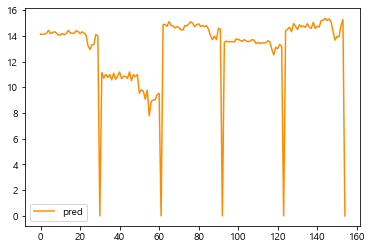

In [97]:
A6_No2 = pd.concat([test, pred.rename(columns={0:'pred_No2'})], axis=1)[['emd_nm_jh','day','pred_No2']]

# 차이예측과 6월로 8월예측 평균을 낸다.
A6_pred = A6_No1.merge(A6_No2.reset_index()[['emd_nm_jh','day','pred_No2']], how='left', on=['emd_nm_jh','day'])
A6_pred['pred'] = (A6_pred['pred_No1'] + A6_pred['pred_No2'])/2
A6_pred.drop(['pred_No1', 'pred_No2'], axis=1, inplace=True)
A6_pred.fillna(0, inplace=True)

# 차이예측과 6월로 8월예측 평균낸걸로 시각화
plt.plot(np.array(A6_pred[['pred']]),label = "pred", color = 'darkorange')
plt.legend()
plt.show()

# 8월 예측 csv

In [98]:
pd.concat([A0_pred.rename(columns={'pred':'lr0'}).drop(['emd_nm_jh','day'], axis=1),
           A1_pred.rename(columns={'pred':'lr1'}).drop(['emd_nm_jh','day'], axis=1),
           A2_pred.rename(columns={'pred':'lr2'}).drop(['emd_nm_jh','day'], axis=1),
           A3_pred.rename(columns={'pred':'lr3'}).drop(['emd_nm_jh','day'], axis=1),
           A4_pred.rename(columns={'pred':'lr4'}).drop(['emd_nm_jh','day'], axis=1),
           A5_pred.rename(columns={'pred':'lr5'}).drop(['emd_nm_jh','day'], axis=1),
           A6_pred.rename(columns={'pred':'lr6'}).drop(['emd_nm_jh','day'], axis=1)], axis=1).to_csv('predict/lr_08_predict.csv', index=False)